## 1. Neural network horse race

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

In [41]:
df = pd.read_csv('strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### (a)

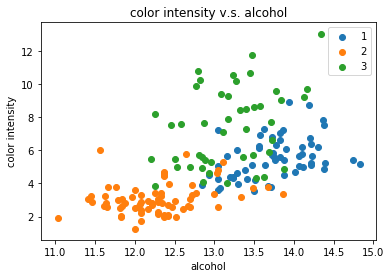

In [42]:
for i in range(1, 4):
    data = df[df['cultivar']==i]
    plt.scatter(data.alco, data.color_int, label=i)
    
plt.xlabel('alcohol')
plt.ylabel('color intensity')
plt.title('color intensity v.s. alcohol')
plt.legend()
plt.show()

### (b)

In [43]:
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df['cultivar']

In [44]:
LogReg = LogisticRegression()
LogReg.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}

random_search1 = RandomizedSearchCV(LogReg, param_distributions=param_dist1, n_iter=200, n_jobs=-1, cv=5,\
                                   random_state=25, scoring='neg_mean_squared_error')
random_search1.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'penalty': ['l1', 'l2'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x073E1730>},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [46]:
print("The best estimator:", random_search1.best_estimator_)
print("The optimal tuning parameter values:", random_search1.best_params_)
print("The MSE of the optimal result:", -random_search1.best_score_)

The best estimator: LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
The optimal tuning parameter values: {'C': 2.665871587495725, 'penalty': 'l1'}
The MSE of the optimal result: 0.11931818181818182


### (c)

In [47]:
param_dist2 = {'n_estimators': sp_randint(10, 200), 'max_depth': sp_randint(2, 4), 'min_samples_split': sp_randint(2, 20),\
              'min_samples_leaf': sp_randint(2, 20), 'max_features': sp_randint(1, 4)}

In [48]:
forest = RandomForestClassifier(bootstrap=True, oob_score=True, random_state=25)
forest.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=25, verbose=0, warm_start=False)

In [49]:
random_search2 = RandomizedSearchCV(forest, param_distributions=param_dist2, n_iter=200, n_jobs=-1, cv=5,\
                                   random_state=25, scoring='neg_mean_squared_error')
random_search2.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=25, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x07451470>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x07451CB0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x07451630>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x07451B10>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0940

In [50]:
print("The best estimator:", random_search2.best_estimator_)
print("The optimal tuning parameter values:", random_search2.best_params_)
print("The MSE of the optimal result:", -random_search2.best_score_)

The best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=18,
            min_weight_fraction_leaf=0.0, n_estimators=176, n_jobs=None,
            oob_score=True, random_state=25, verbose=0, warm_start=False)
The optimal tuning parameter values: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
The MSE of the optimal result: 0.13068181818181818


### (d)

In [56]:
svc = SVC(kernel='rbf')
svc.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0), 'gamma': ['scale', 'auto'], 'shrinking': [True, False]}

In [58]:
random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3, n_iter=200, n_jobs=-1, cv=5,\
                                   random_state=25, scoring='neg_mean_squared_error')
random_search3.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x094A78B0>, 'gamma': ['scale', 'auto'], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [60]:
print("The best estimator:", random_search3.best_estimator_)
print("The optimal tuning parameter values:", random_search3.best_params_)
print("The MSE of the optimal result:", -random_search3.best_score_)

The best estimator: SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The optimal tuning parameter values: {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
The MSE of the optimal result: 0.14772727272727273


### (e)

In [61]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100), 'activation': ['logistic', 'relu'], 'alpha': sp_uniform(0.1, 10.0)}

In [68]:
network = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1)
network.fit(X, y)

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
random_search4 = RandomizedSearchCV(network, param_distributions=param_dist4, n_iter=200, n_jobs=-1, cv=5,\
                                   random_state=25, scoring='neg_mean_squared_error')
random_search4.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x073E1BB0>, 'activation': ['logistic', 'relu'], 'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x073E9A30>},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [70]:
print("The best estimator:", random_search4.best_estimator_)
print("The optimal tuning parameter values:", random_search4.best_params_)
print("The MSE of the optimal result:", -random_search4.best_score_)

The best estimator: MLPClassifier(activation='relu', alpha=0.23318052236376277, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=18, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
The optimal tuning parameter values: {'activation': 'relu', 'alpha': 0.23318052236376277, 'hidden_layer_sizes': 18}
The MSE of the optimal result: 0.08522727272727272


### (f)

The MSE of logistic regression is 0.1193. The MSE of random forest is 0.1307. The MSE of support vector machine is 0.1477. The MSE of neural network is 0.0852. Since the MSE of the neural network is the lowest, the best predictor of cultivar is the neural network model.